# EDA - Shipment Pricing Prediction

## 1. Problem Statement
##### a) You have to predict cost to ship sculptures based on the dataset used below. 
##### b) You should analyse the dataset and find out how different variable affect the cost (target variable). 
##### c) Also draw different distributions and explore the data to find various out things that might be help to predict the data more accuratly.


## 2. Import the data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the CSV data as PandaDataFrame

In [2]:
df = pd.read_csv('/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/data/train.csv')

#### Show Top 5 Records

In [3]:
df.head(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


#### Shape of the dataset

In [4]:
# Shows rows and columns in the dataset
df.shape

(6500, 20)

#### Summary of the Dataset

In [5]:
# Describe summary statistics for the dataframe
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


## Statistical Inferences
##### 1) Mean Price of Sculptures is 1192.
##### 2) 25% of population has Price of Sculpture slightly above 5
##### 3) 50% of population has Prive of Sculpture below 10
##### 4) Average Reputation of an Artist is 0.46
##### 5) The different between 75% and max also suggest Skewness.
##### 6) There is skewness in Height, Width, Base Shipping Price, It might be because of the Outliers.


### Check the datatypes of the Dataset

In [6]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [7]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [8]:
null_values = len([feature for feature in df.columns if df[feature].isnull().sum() != 0])
print('Number of features with Null values :', null_values)

Number of features with Null values : 7


# 3. Exploring Data

In [27]:
target_feature = 'Cost'

#### As there are both object and numerical features, so we are separating the data into numerical and categorical features

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


## Univariate Analysis
#### It is an analysis done on only one variable. This is used to see the distribution of values of a single variablele

### Numerical Features

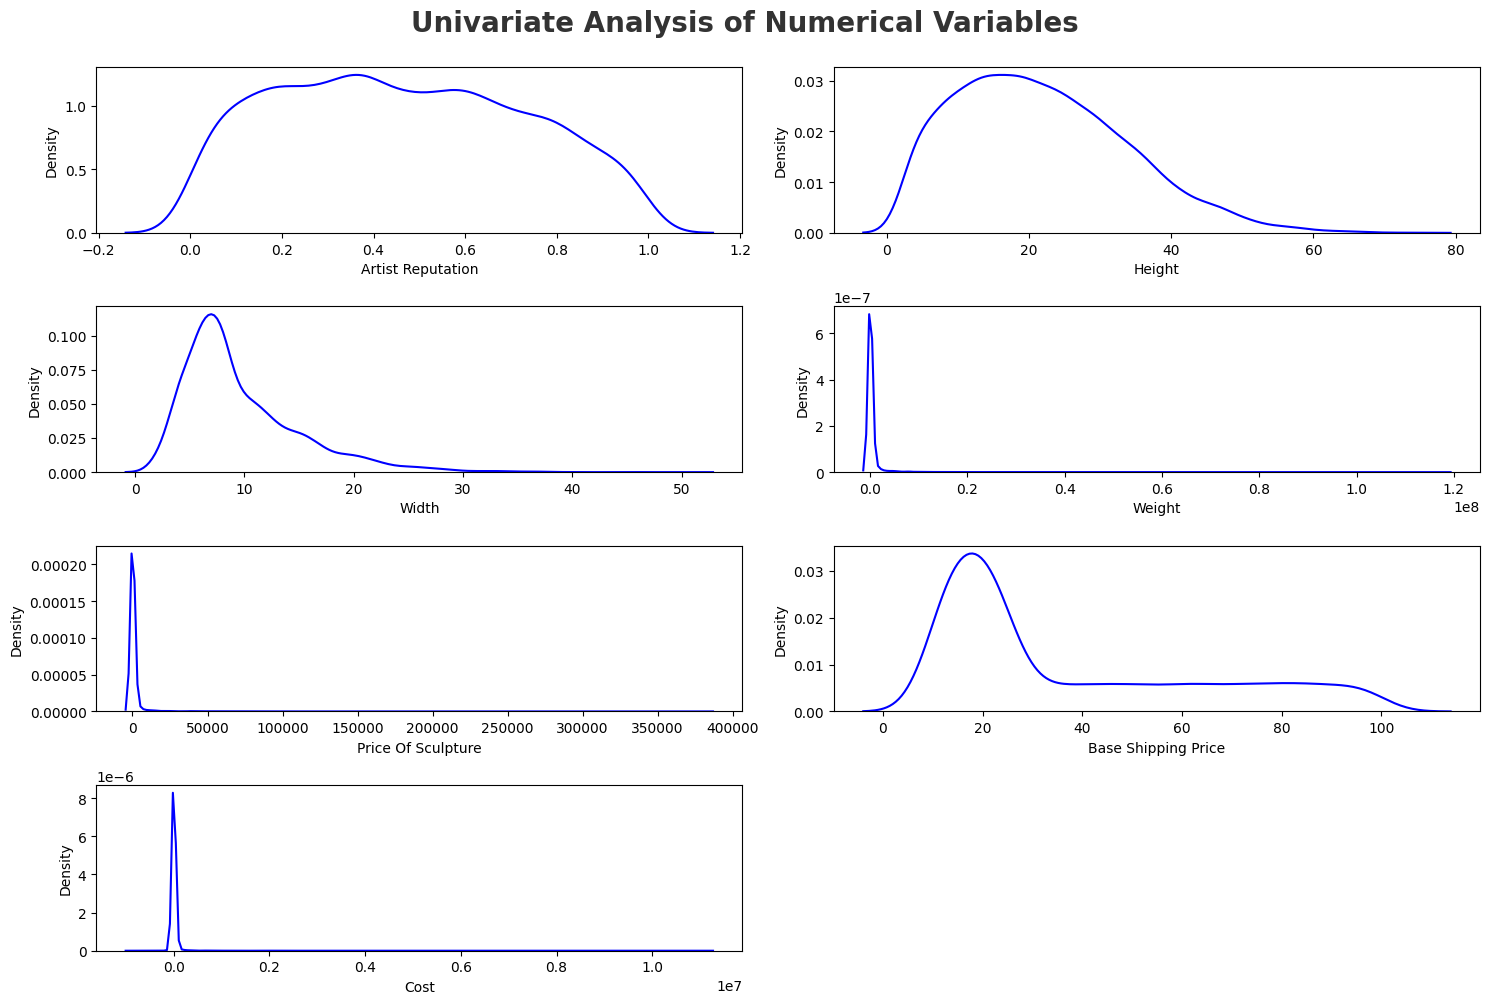

In [11]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Variables', fontsize=20 , fontweight='bold' , alpha=0.8 , y=1 )

for i in range(0, len(numeric_features)):
    plt.subplot(4,2, i+1)
    sns.kdeplot(data = df, x = numeric_features[i], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Observations:
#### 1) Height, Width and Base Shipping Price is positively skewed
#### 2) Weight, Price of Sculpture have many outliers

### Categorical Features

In [12]:
# Finding the unique features in every column
categorical_columns = []
for i in categorical_features:
    print(f'{i} : {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)

Customer Id : 6500
Artist Name : 6449
Material : 8
International : 2
Express Shipment : 2
Installation Included : 2
Transport : 4
Fragile : 2
Customer Information : 2
Remote Location : 3
Scheduled Date : 1660
Delivery Date : 1664
Customer Location : 6500


### Observation
#### 1) Customer Id, Artist Name, Customer Location have 6500 unique values, so they can be dropped
#### 2) Scheduled Date, Delivery Date have outliers, so they need feature engineering.

In [13]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

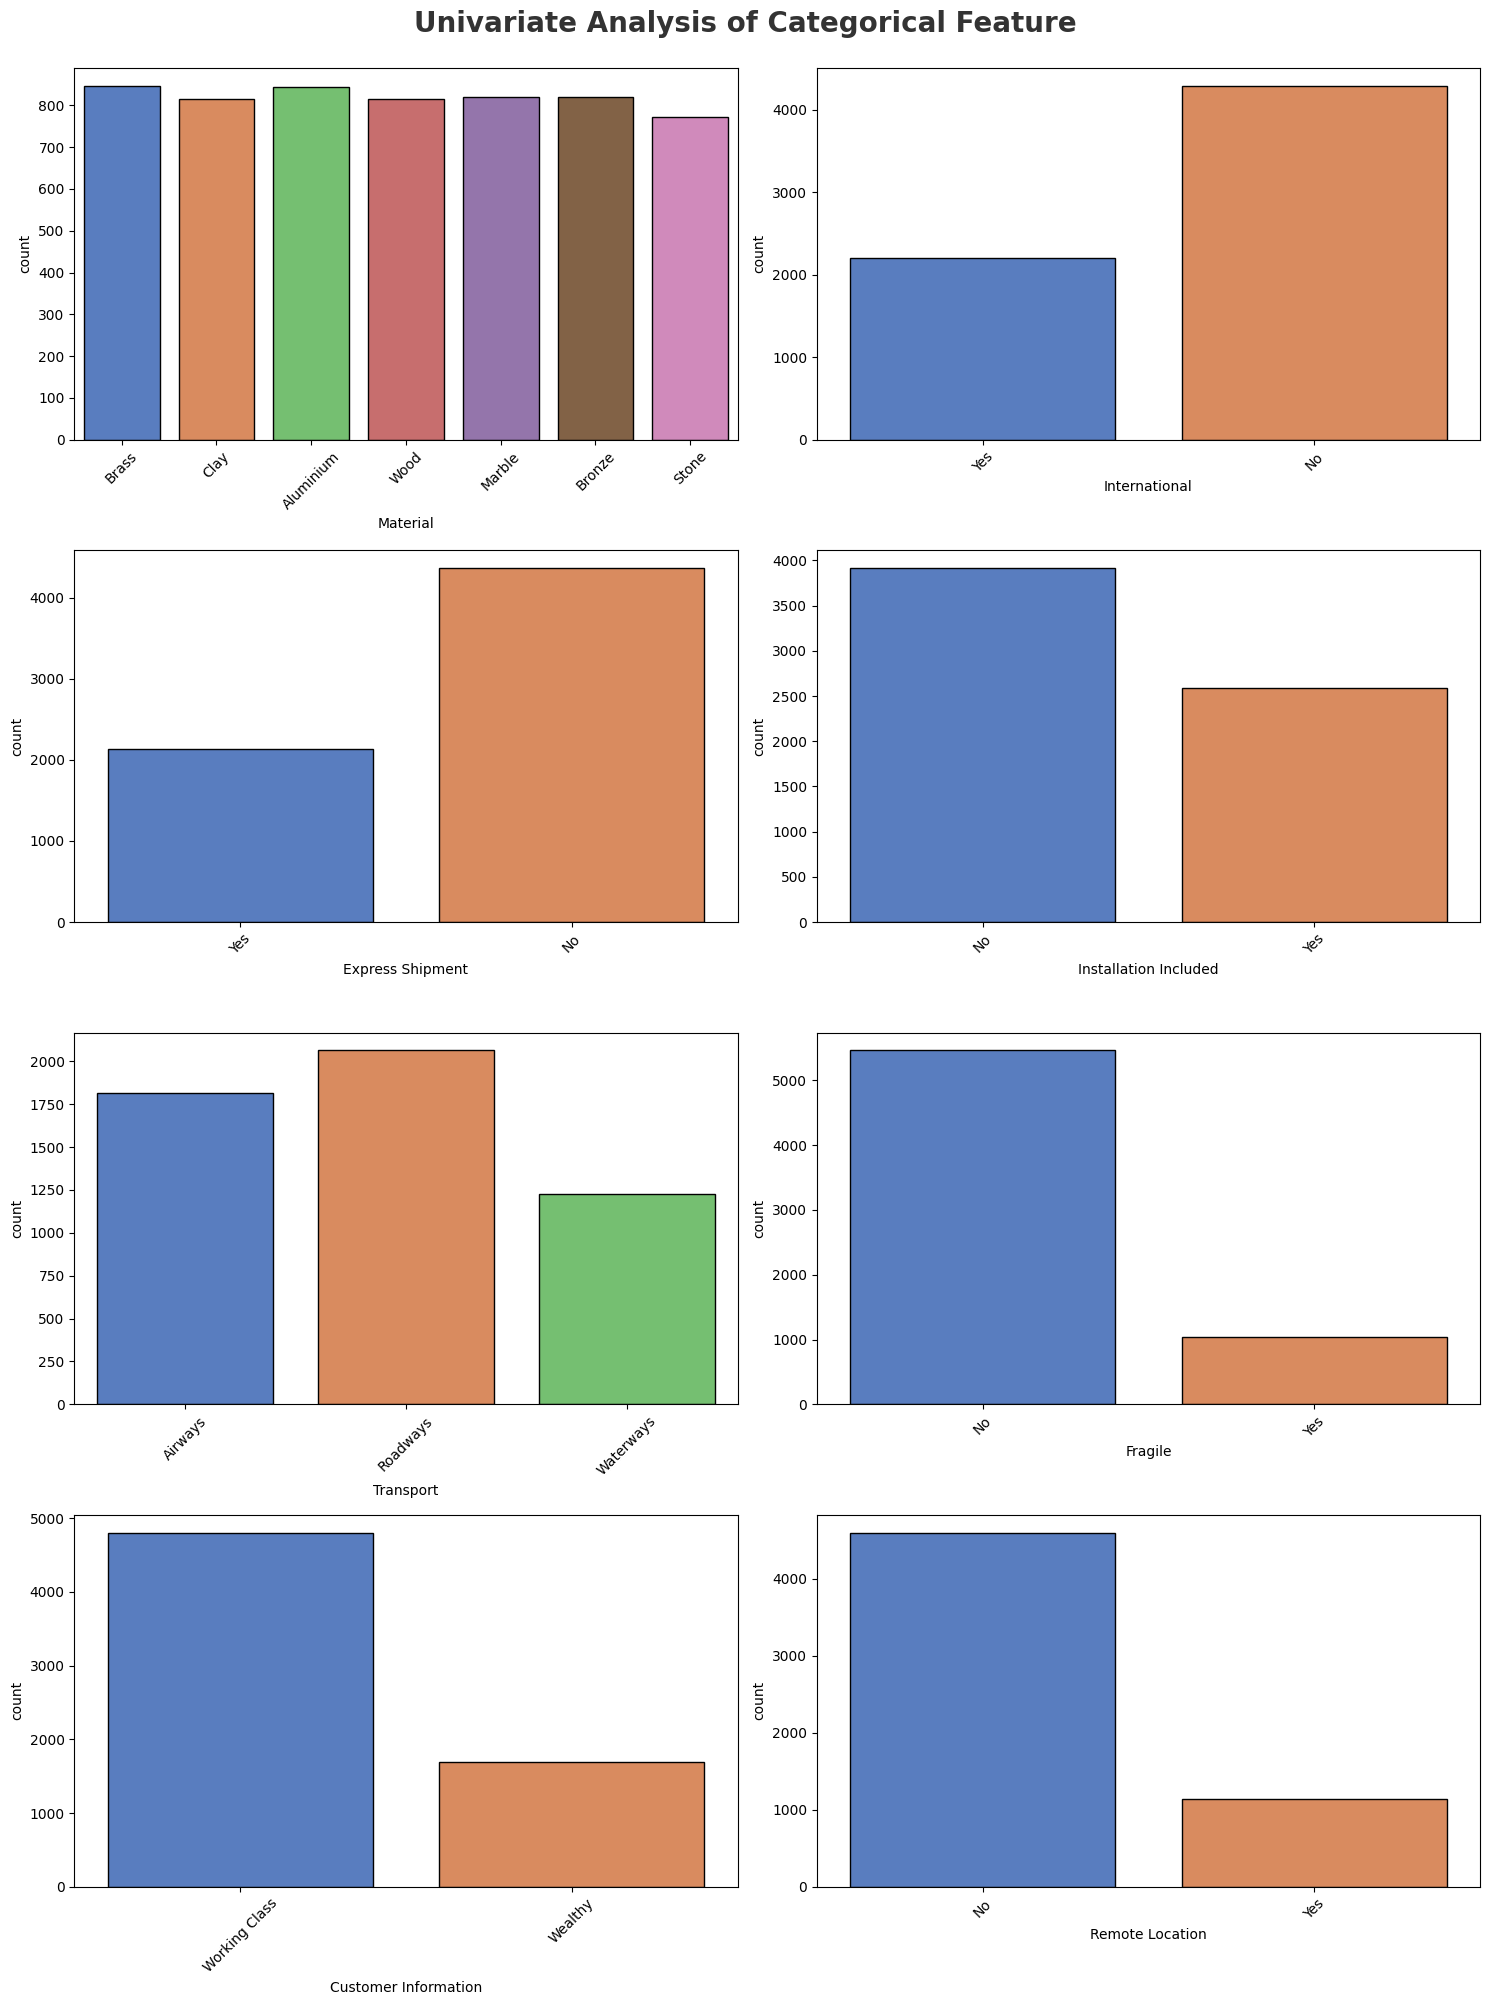

In [106]:
# categorical column
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(categorical_columns)):
    plt.subplot(4,2, i+1)
    sns.countplot(data = df, x = categorical_columns[i], palette= 'muted', ec='black' ,legend=False, hue=categorical_columns[i])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

### Observations
#### 1) Material Column has 7 uniques values, which are all equally distributed
#### 2) There are 6 bi-variate categorical columns

## Multivariate Analysis
### It is the analysis on more than one variable

### Correlation in Numerical Features

In [19]:
numeric_corr=df[numeric_features].corr()
numeric_corr

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


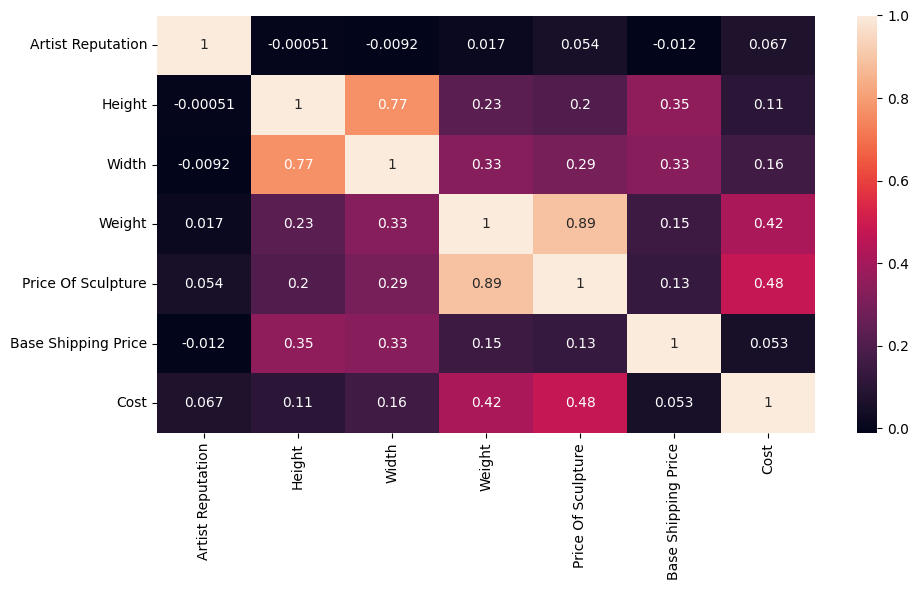

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_corr, annot=True, cbar=True)
plt.tight_layout()

### Observation
#### There is high correaltion between height-Weight and Weight-Price of Sculpture

### Relationship between Target and Numerical variable

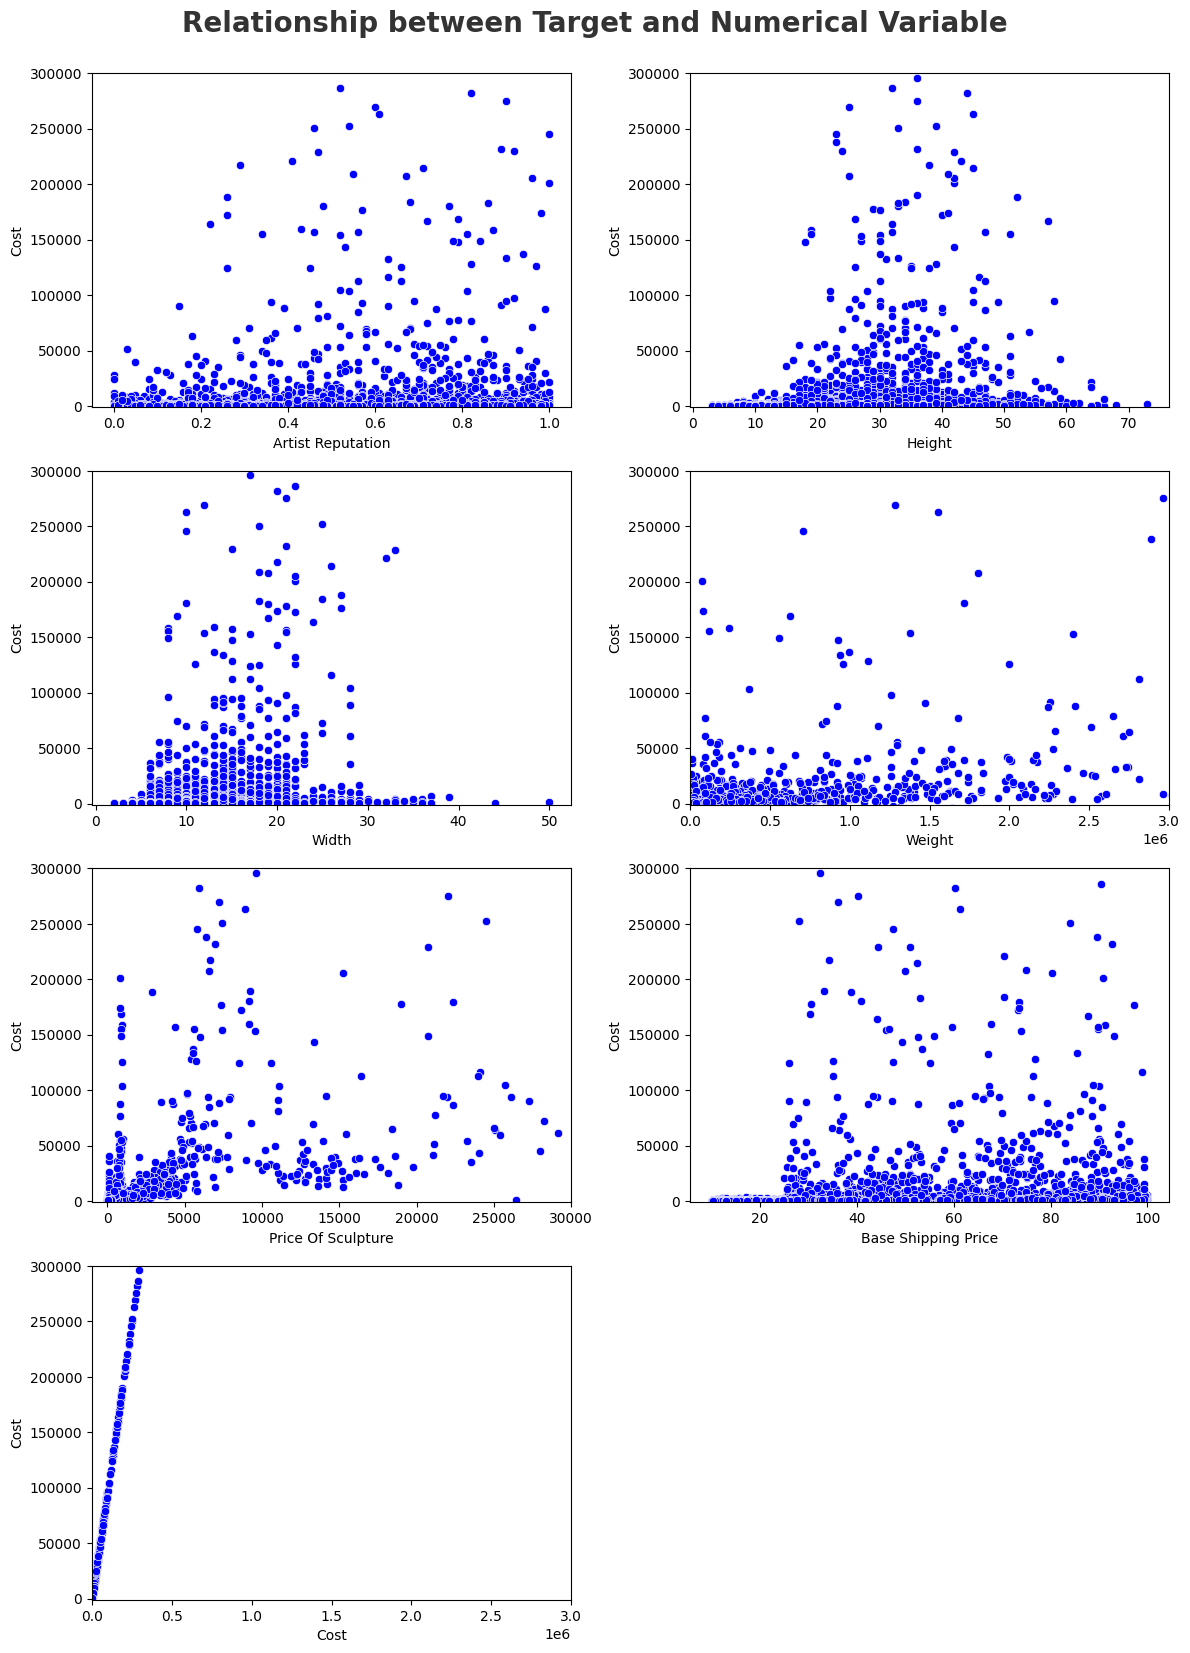

In [32]:
plt.figure(figsize=(12,24))
plt.suptitle("Relationship between Target and Numerical Variable",fontsize=20,fontweight='bold',alpha=0.8,y=1 )
for i in range(0, len(numeric_features)):
    plt.subplot(6,2,i+1)
    sns.scatterplot(y = target_feature, x = numeric_features[i], data = df, color='b')
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

### Observation
#### 1) There seem to be very low linear relationship between Dependent and Independent Variable
#### 2) There seem to be linear relationsip between Price of Sculpture and Cost

## Visualising Independent Columns

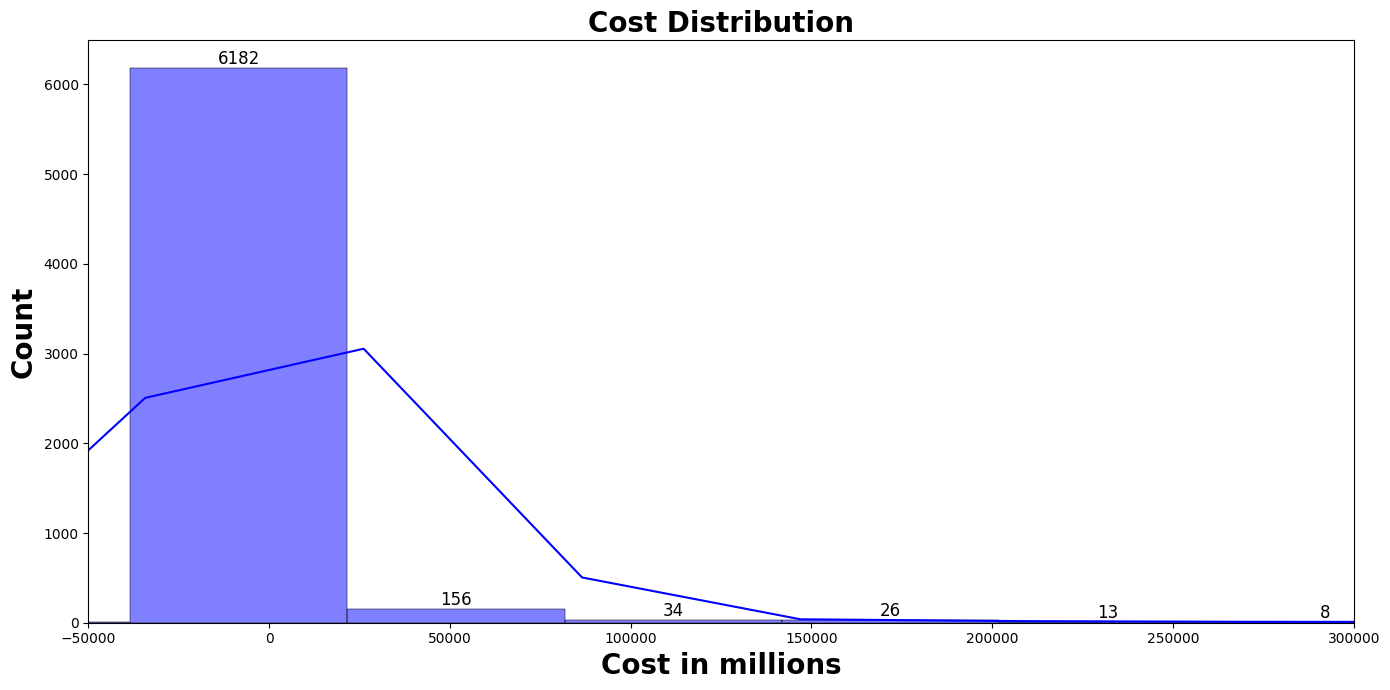

In [105]:
# Target Feature
plt.figure(figsize=(14,7))
plt.title('Cost Distribution', weight='bold', fontsize=20)
ax = sns.histplot(x = target_feature, data= df, kde=True, color='b', bins=200,ec='black' )
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.xlim(-50000, 300000)
plt.xlabel('Cost in millions', fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=20, weight='bold')
plt.tight_layout()

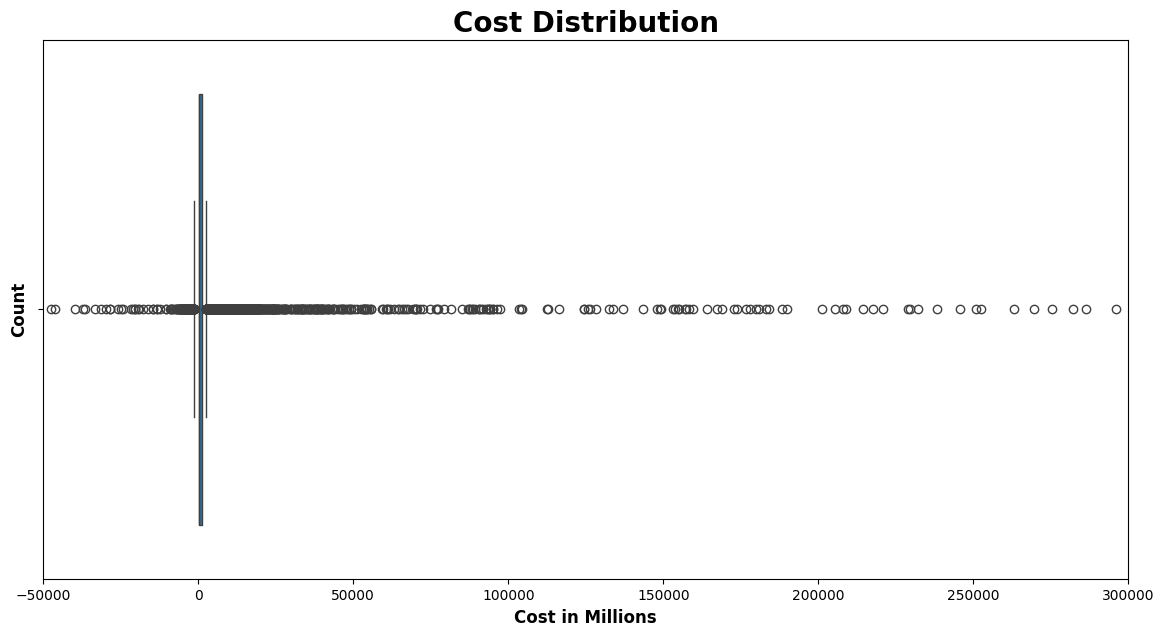

In [53]:
plt.figure(figsize=(14,7))
sns.boxplot(x = target_feature, data=df)
plt.title("Cost Distribution",fontsize=20, weight='bold')
plt.xlabel('Cost in Millions', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.xlim(-50000, 300000)
plt.show()


### Observation
#### There are a lot pf outliers on Target Feature. We need to transform it.

### How shipment type is affecting the cost of shipment ?

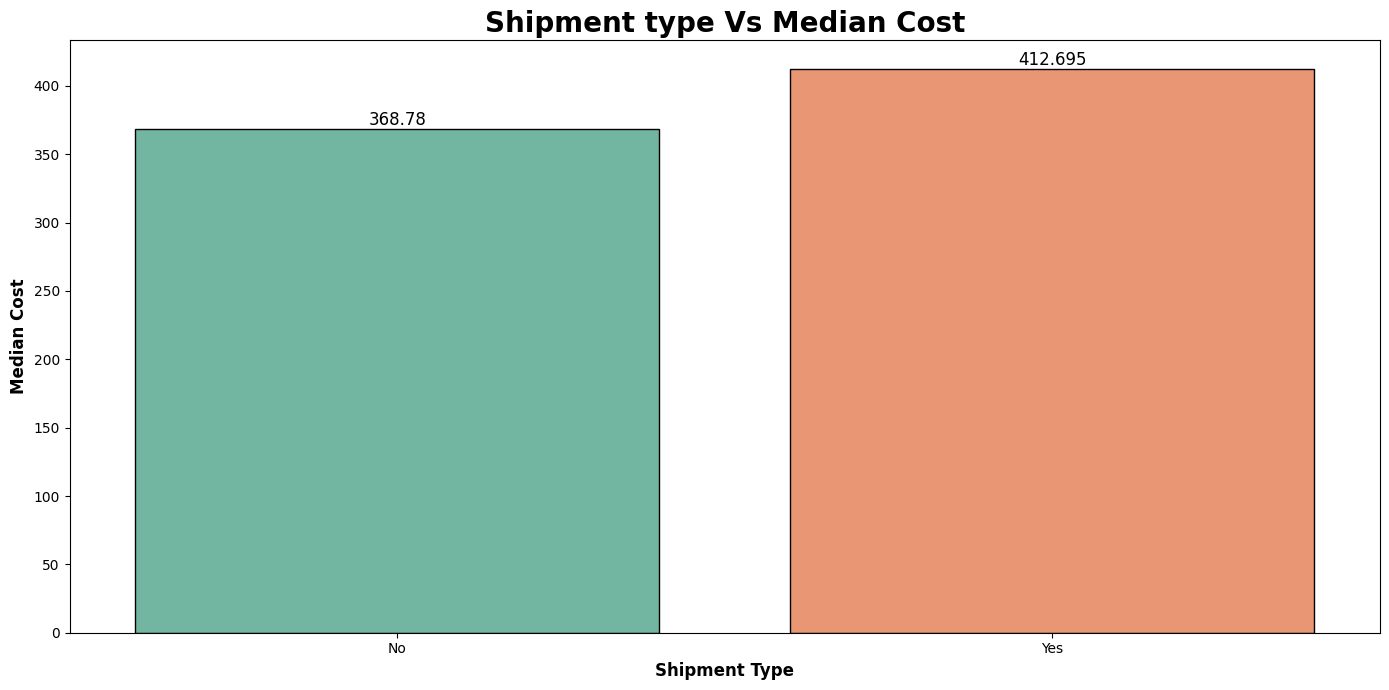

In [104]:
International = df.groupby("International")[target_feature].median()
International.to_frame()
plt.figure(figsize=(14,7))
plt.title("Shipment type Vs Median Cost",fontsize=20, weight='bold')
ax=sns.barplot(x=International.index,y=International.values,palette='Set2',legend=False,hue=International,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.xlabel('Shipment Type', fontsize=12, weight='bold' )
plt.ylabel('Median Cost', fontsize=12, weight='bold')
plt.tight_layout()

In [87]:
df.groupby("International")[target_feature].median()

International
No     368.780
Yes    412.695
Name: Cost, dtype: float64

In [75]:
df['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [85]:
International_shipment_cost = df[df['International'] == 'Yes']['Cost'].median()
Domestic_shipment_cost = df[df['International'] == 'No']['Cost'].median()

print('Difference between median shipment price of International and Domestic:', International_shipment_cost-Domestic_shipment_cost)

Difference between median shipment price of International and Domestic: 43.91500000000008


### Observation
#### 1) There is a difference of 43 in the shipping cost between International and Domestic Shipment. So, It won't affect much at the prediction.
#### 2) There is not much difference between shipment cost of Internatioanl and Domestic Shipment Types.

### How is Express Shipment affecting the cost of Shipment ?

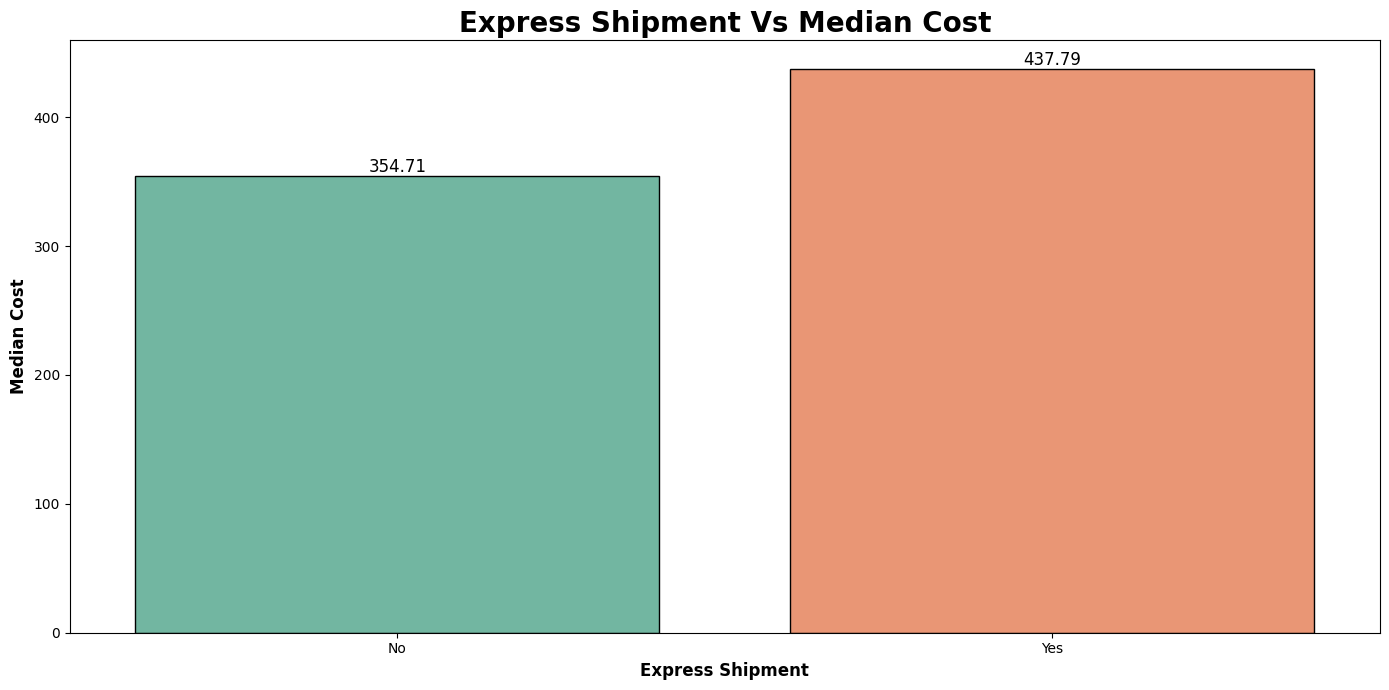

In [108]:
express_ship = df.groupby('Express Shipment')[target_feature].median()
express_ship.to_frame()

plt.figure(figsize=(14,7))
ax = sns.barplot(x=express_ship.index, y=express_ship.values, palette='Set2',ec='black' ,hue=express_ship, legend=False)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title("Express Shipment Vs Median Cost",fontsize=20, weight='bold')
plt.xlabel('Express Shipment', fontsize=12, weight='bold')
plt.ylabel('Median Cost', fontsize=12, weight='bold')
plt.tight_layout()


In [109]:
df['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [110]:
df.groupby('Express Shipment')[target_feature].median()

Express Shipment
No     354.71
Yes    437.79
Name: Cost, dtype: float64

In [116]:
express_shipment_median= df[df['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = df[df['Express Shipment'] == 'No']['Cost'].median()

print('Difference between Express and Normal Shipment:', express_shipment_median - normal_shipment_median)

Difference between Express and Normal Shipment: 83.08000000000004


### Observation
#### 1)In express shipment also, there is only a difference of 83 in the shipping cost between International and domestic, so it won't affect much at the prediction
#### 2) It's obvious that there are more normal delivery than express 

### How Installation included or not is affecting cost of shipment?

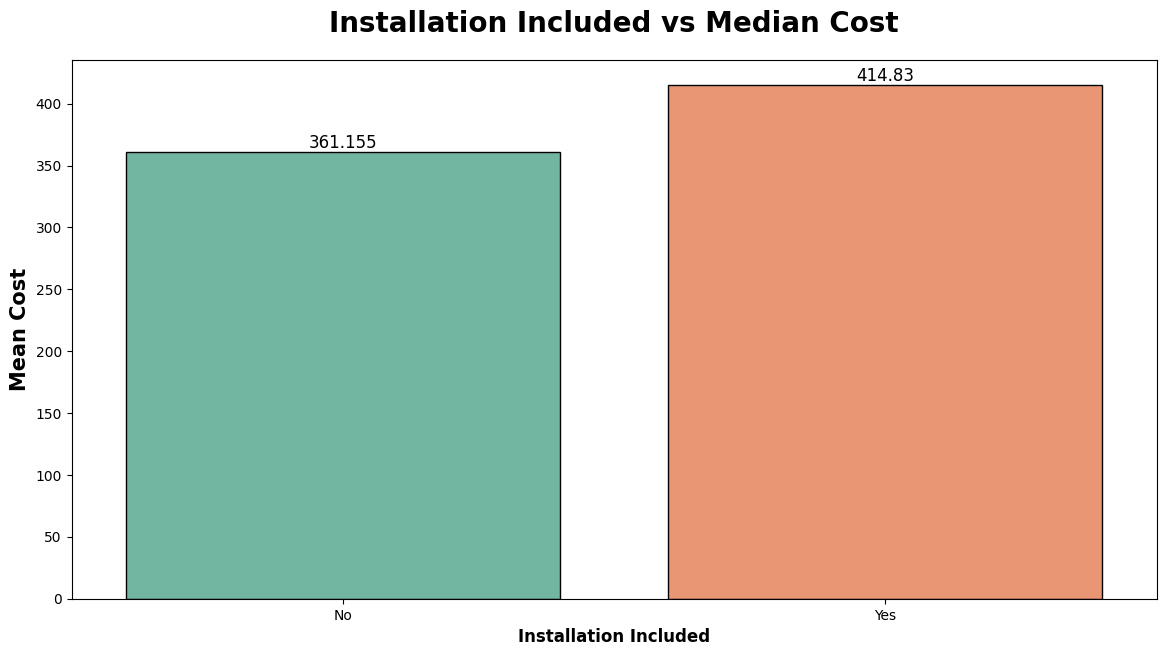

In [119]:
installation = df.groupby('Installation Included')[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(14,7))
ax = sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set2", legend=False, hue=installation)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

In [120]:
df['Installation Included'].value_counts()

Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

In [121]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median}")

The difference between the median shipment price of Installation Included and not is 53.67500000000001


### Observation
#### 1) There is only a difference of 53 which won't make much a difference at the time of prediction
#### 2) We can see that the charges for not installation is less and values are more, which says that a business should try to take contract which requires installation

### How Fragile Cost is affecting cost of shipment?

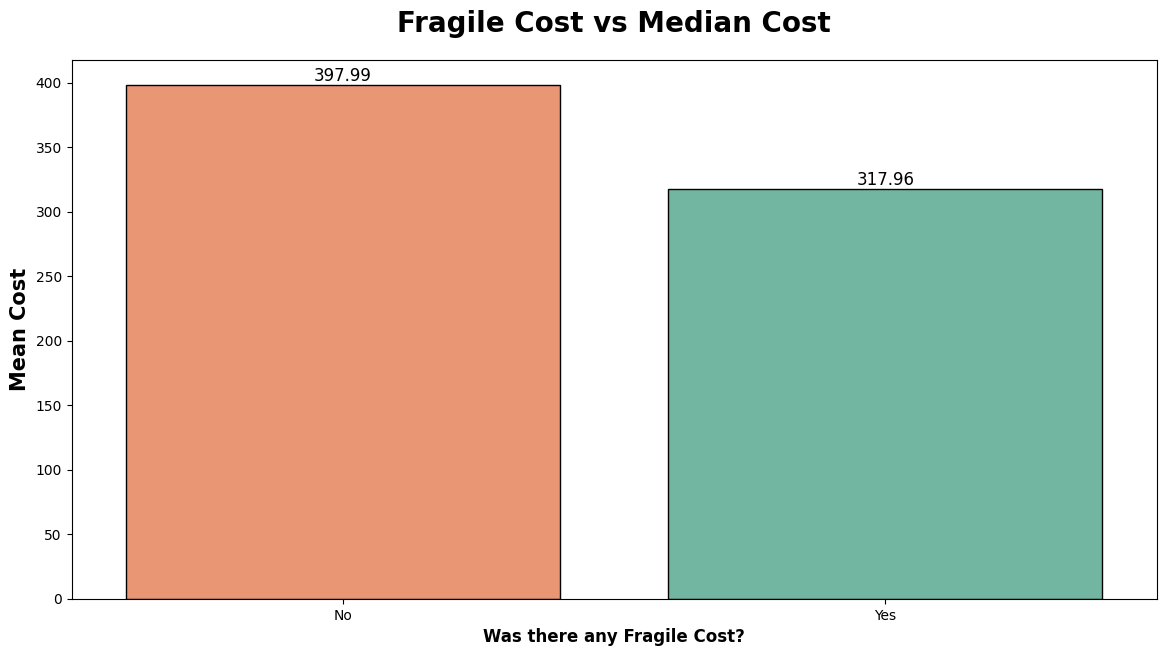

In [123]:
fragile = df.groupby('Fragile')[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(14,7))
ax = sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set2", legend=False, hue=fragile)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

In [125]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {fragile_median-fragile_not_median}")

The difference between the median shipment price of Fragile cost and non-fragile cost is -80.03000000000003


### Observation
#### 1) There is only a difference of -80 which says that the median cost is more if there is no fragile cost and because the number is small it won't make much of a difference at the time of training model

### How delivery location is affecting cost of shipment?

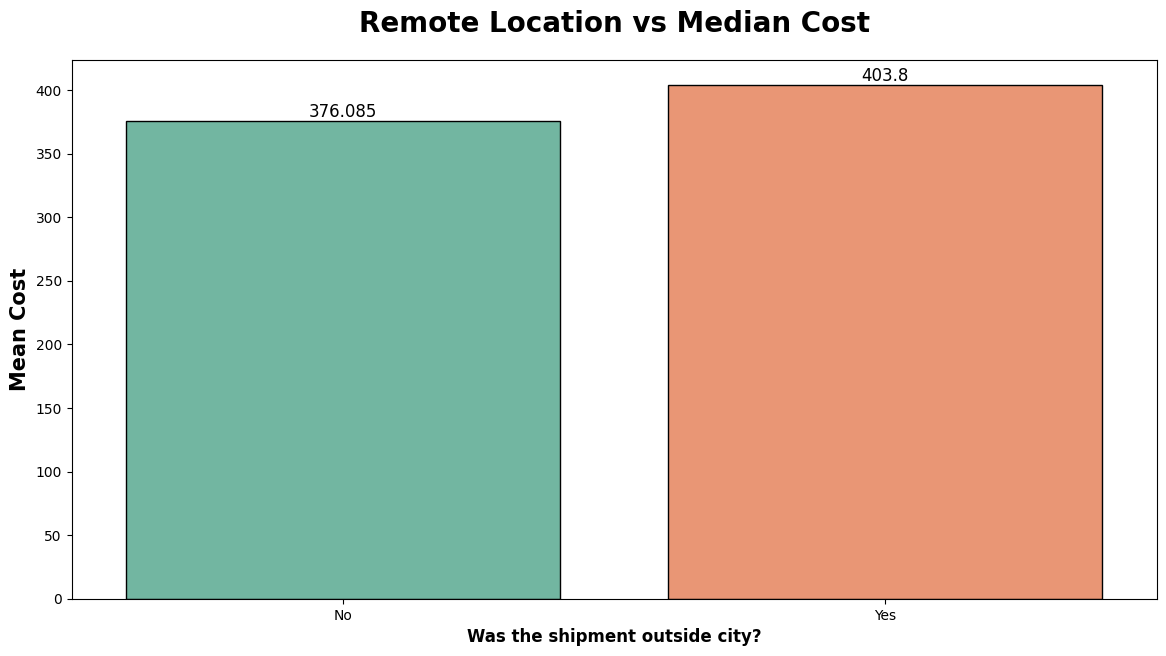

In [126]:
remote = df.groupby('Remote Location')[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(14,7))
ax = sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2", legend=False, hue=remote)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

In [127]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")


The difference between the median shipment price of remote shipment and non-remote shipment cost is 27.714999999999975


### Observation
#### There is only a difference of 27 which won't make much a difference at the time of prediction

### How Customer Financial condition is affecting cost of shipment?

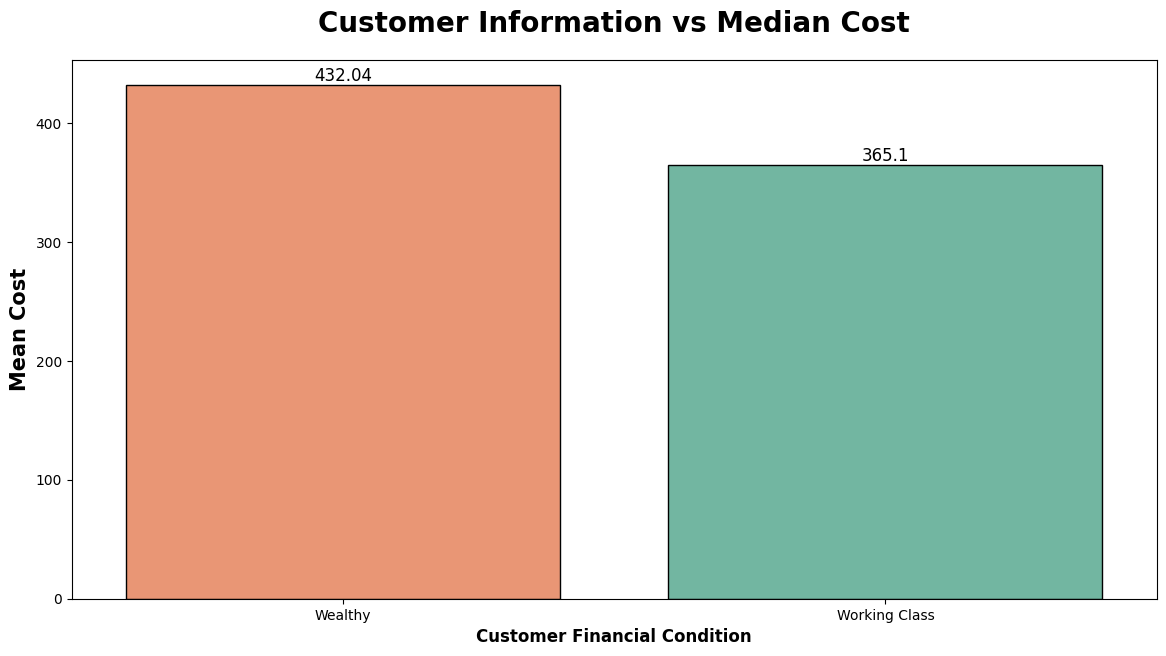

In [128]:
cust_info = df.groupby('Customer Information')[target_feature].median()
cust_info.to_frame()

plt.subplots(figsize=(14,7))
ax = sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2", legend=False, hue=cust_info)
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

In [129]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 66.94


### Observation
#### There is only a difference of 66 which won't make much a difference at the time of prediction

### Report
#### After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also

## Visualising Data Columns

In [141]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'], format="%m/%d/%Y %I:%M:%S %p")
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format="%m/%d/%Y %I:%M:%S %p")


In [143]:
df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [144]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [149]:
x = df.groupby(['year', 'month'])['Cost'].median()
df_wide = x.unstack().T
df_wide

year,2015,2016,2017,2018,2019
month,,,,,
1,337.920,376.300,363.180,302.735,411.200
2,366.190,389.255,376.790,427.450,361.845
3,474.510,401.170,307.720,508.750,309.360
4,326.550,460.570,473.685,422.450,408.290
5,450.610,477.870,354.090,346.330,419.210
6,298.230,433.430,348.420,373.070,389.210
7,351.620,458.830,266.380,456.505,362.840
8,344.470,469.610,461.980,391.970,382.740
9,434.570,392.865,287.775,375.450,NaN


In [148]:
x = df.groupby(['year', 'month'])['Cost'].median()
x

year  month
2015  1        337.920
      2        366.190
      3        474.510
      4        326.550
      5        450.610
      6        298.230
      7        351.620
      8        344.470
      9        434.570
      10       375.850
      11       393.655
      12       497.325
2016  1        376.300
      2        389.255
      3        401.170
      4        460.570
      5        477.870
      6        433.430
      7        458.830
      8        469.610
      9        392.865
      10       376.575
      11       389.005
      12       341.030
2017  1        363.180
      2        376.790
      3        307.720
      4        473.685
      5        354.090
      6        348.420
      7        266.380
      8        461.980
      9        287.775
      10       310.250
      11       404.050
      12       347.360
2018  1        302.735
      2        427.450
      3        508.750
      4        422.450
      5        346.330
      6        373.070
      7        456.505

In [150]:
df_wide[2015]

month
1     337.920
2     366.190
3     474.510
4     326.550
5     450.610
6     298.230
7     351.620
8     344.470
9     434.570
10    375.850
11    393.655
12    497.325
Name: 2015, dtype: float64

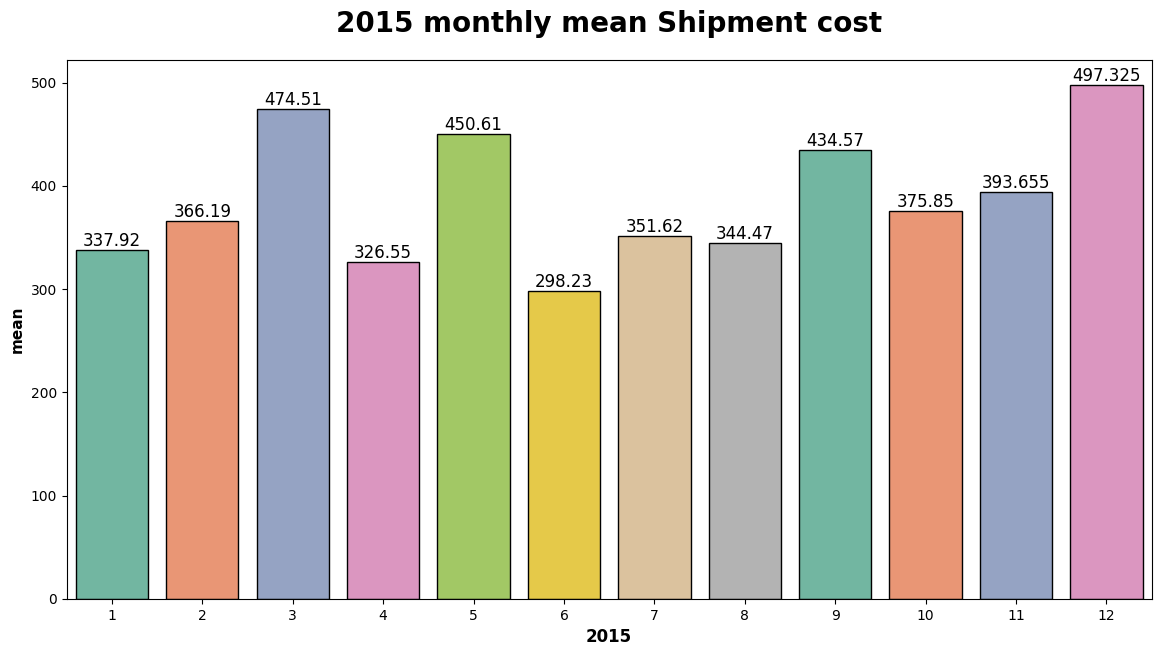

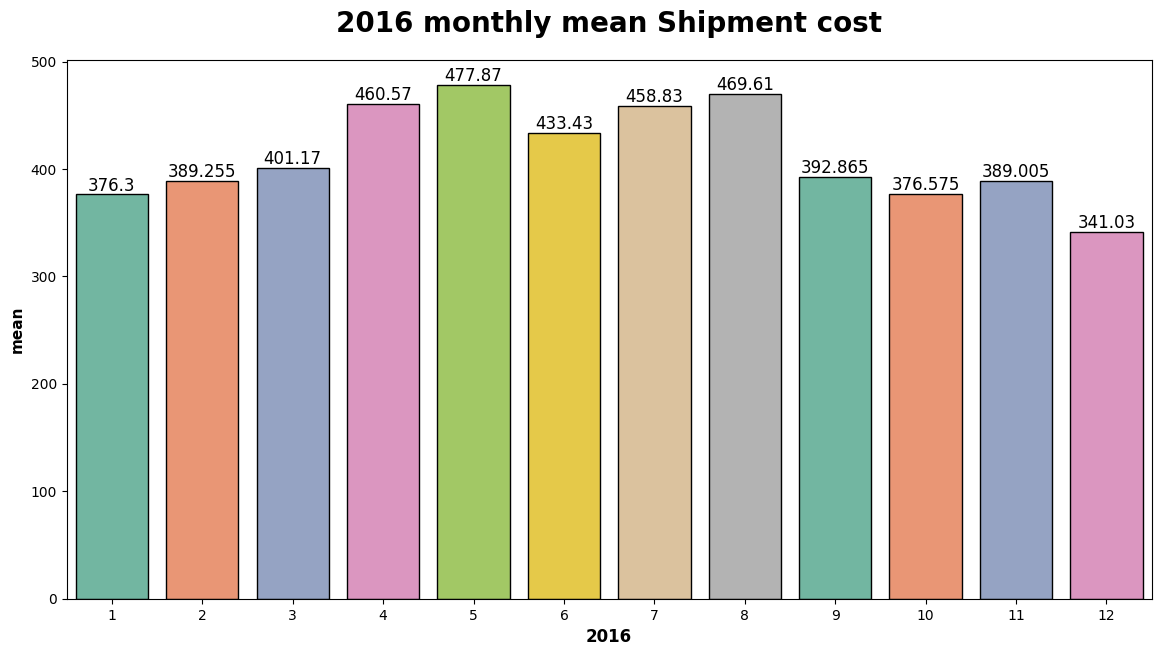

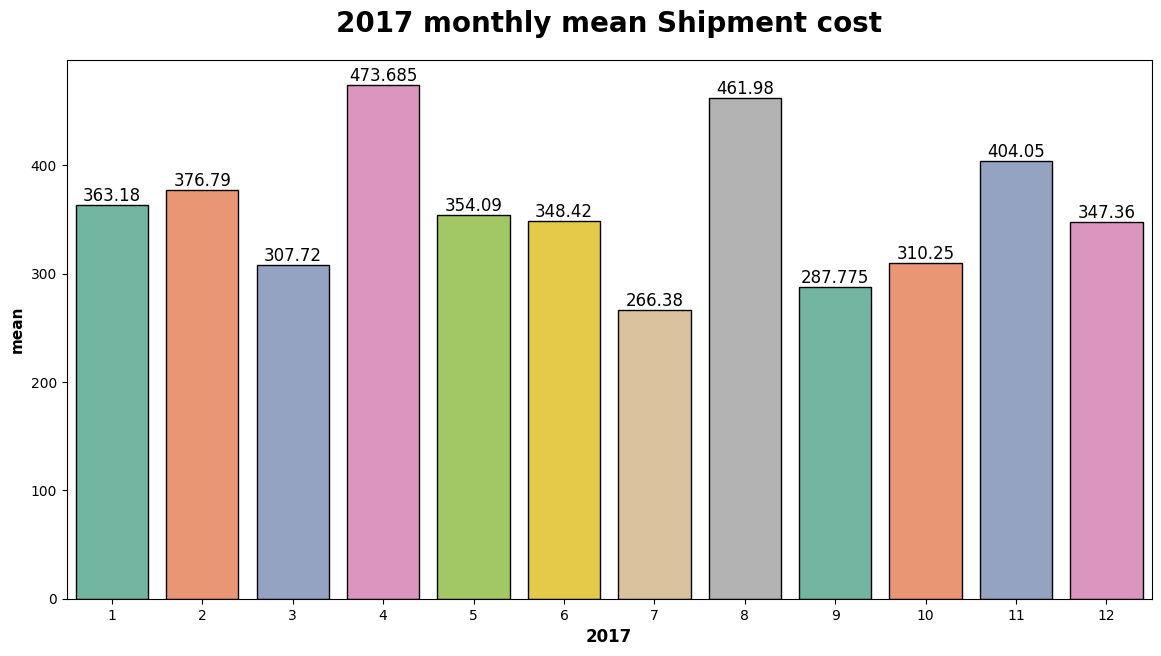

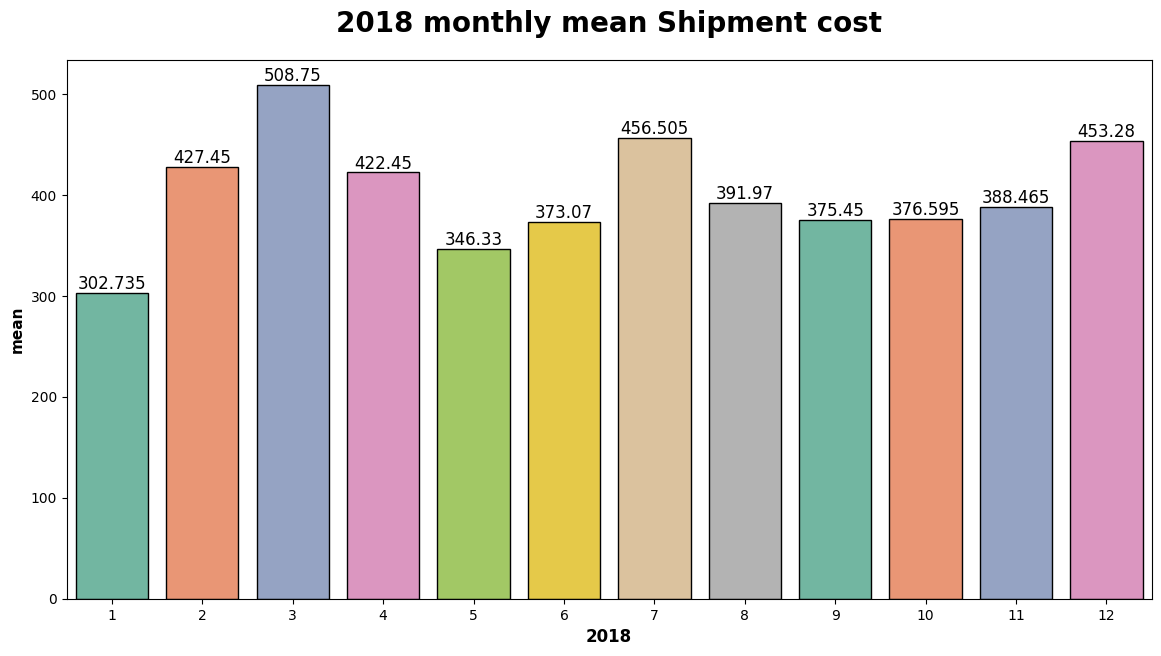

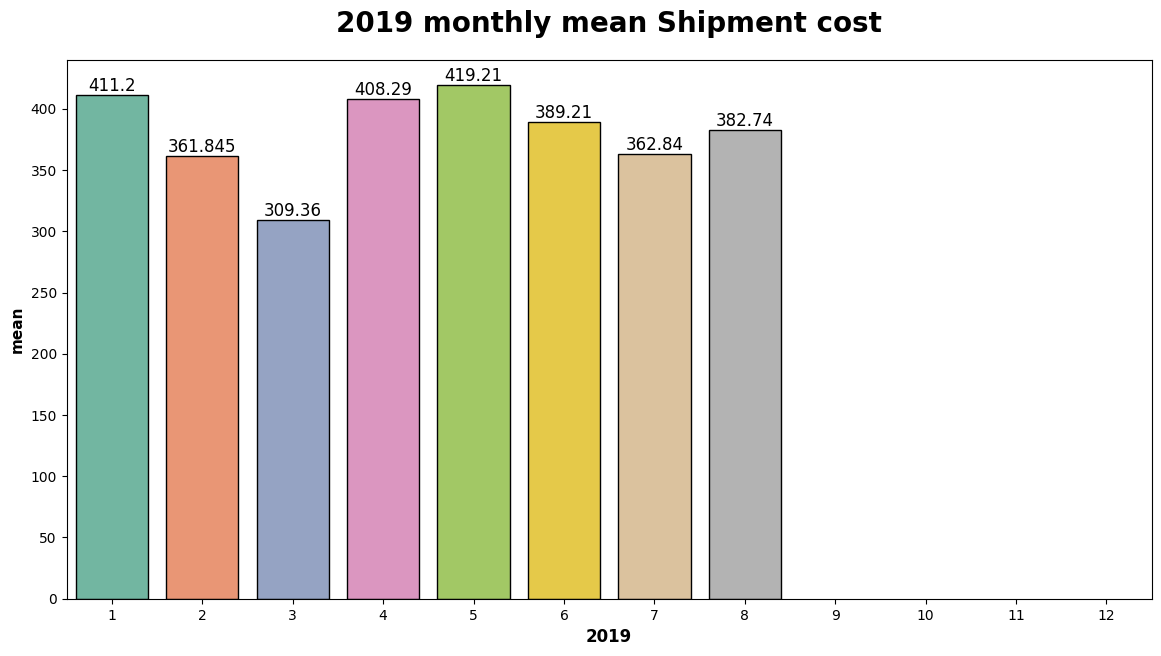

In [157]:
for i in df_wide.columns:
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df_wide.index, y = df_wide[i], palette='Set2', ec='black', legend=False, hue=df_wide.index)
    for j in ax.containers:
        ax.bar_label(j, fontsize=12)
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

### Observation
#### 1) Monthly distribution of every year is different.
#### 2) For 2015, 2016 and 2018 There were more cost at the start and end of the year.
#### 3) For 2017 and 2019 cost were high mid year.

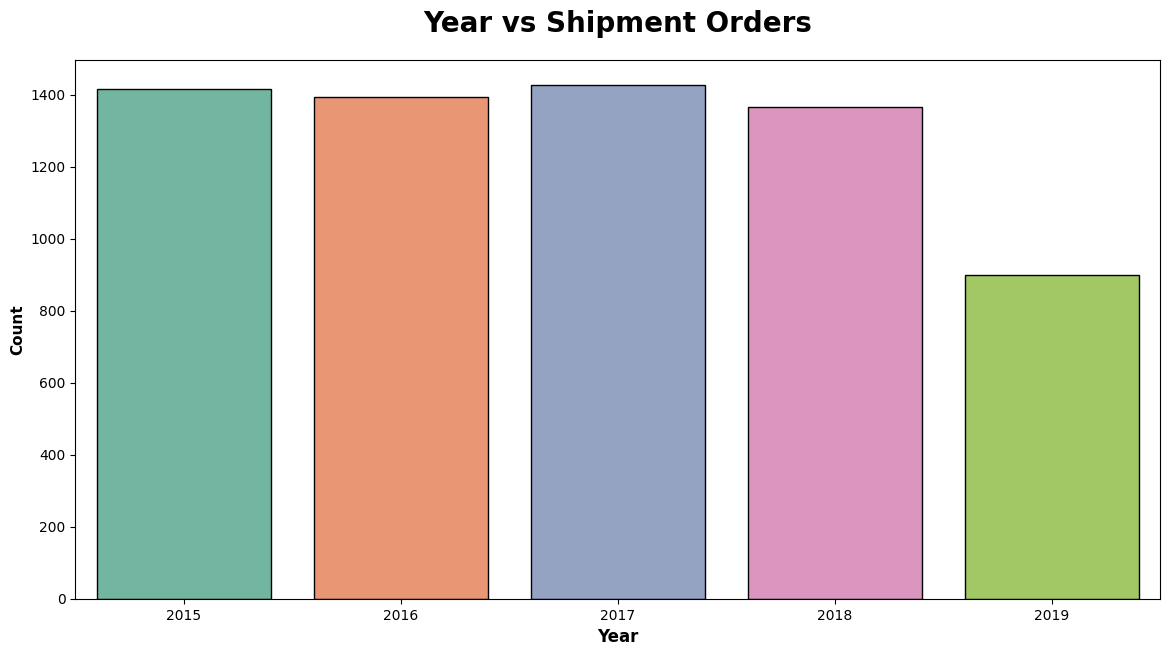

In [160]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.year,ec = "black", palette="Set2", legend=False, hue=df.year)
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

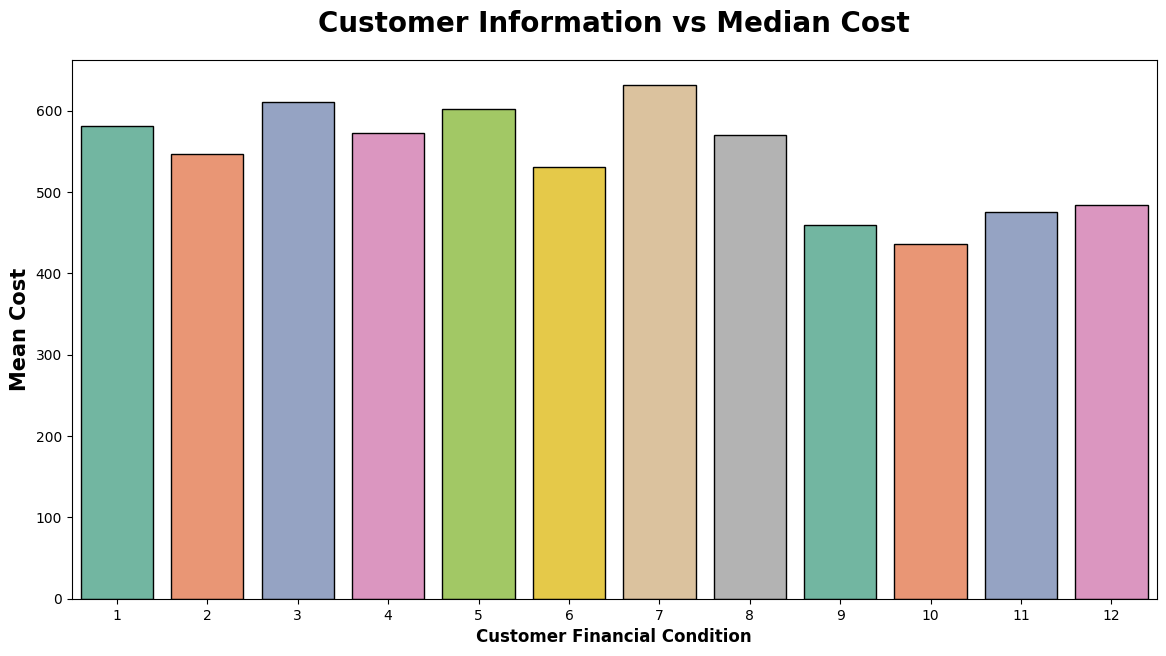

In [165]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.month,ec = "black", palette="Set2", hue=df.month, legend=False)
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

# Final Report
#### The `Cost` column is the target to predict.
#### The target variable here is continuous.
#### There are outliers in some columns we have to remove outliers.
#### date` column should be configured to extract `year` and `month`.
#### Null values in `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled